# <font color = 'blue' > Aprendendo analisar os dados de consumidores

In [1]:
# importando pacotes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import datetime as dt
import numpy as np

# lendo arquivo

df = pd.read_excel("C:\PythonFundamentos\Cap07\dados.xlsx")

In [2]:
#conhecendo a tabela

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#conhecendo as colunas

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
# verificando métricas da tabela

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# verificando a existência de dados em brancos ou nulos

print( df.isnull().any() )

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool


In [6]:
# verificando quantos registros em branco existe em cada dimensão

print( df.isnull().sum() )

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
# Somando os dados em falta

#soma total dos dados que estão nulos na minha tabela

dados_faltantes = df.isnull().sum() 

print(dados_faltantes.sum())

#Retorna o dimensionamento da tabela (linhas, colunas)-->podemos saber quantos elementos cabem na nossa 
#tabela, por exemplo: tabela (2,1), cabem 2 elementos (2 * 1 = 2), uma (3,3) cabem 9 elementos (3 * 3 = 9);

print(df.shape) 

# Realiza o produto da dimensão da tabela, por exemplo --> tabela (2,2) --> 2*2 = 4;

print(np.product(df.shape)) 

# Percntual de dados faltantes na tabela = pega o número/soma de elementos nulos/quantidade máxima da tabela (quantos cabem na tabela)

percentual_de_dados_faltantes = (dados_faltantes.sum()/np.product(df.shape)) * 100

print('Percentual de dados faltantes:', round(percentual_de_dados_faltantes, 2), '%')

136534
(541909, 8)
4335272
Percentual de dados faltantes: 3.15 %


In [8]:
#soma dos dados idenficados do comprador;

#Traz a soma dos elementos;
df_identificado = df['CustomerID'].notnull().sum()

# Retorna a tabela contendo algum valor na coluna
#CustomerID. Caso acrescente ao fim shape[0], retornará a dimensão
# total da tabela;

#df_identificado2 = pd.notnull(df['CustomerID'])

# Retorna o filtro na tabela para da coluna que contenham algum
# valor na sua linha. Com o shape[0] retorna o tamanho dessa 
# tabela filtrada;

#df_identificado3 = df[pd.notnull(df['CustomerID'])].shape[0]


#Soma dos dados NAO identificados do comprador:

df_naoidentificado = df['CustomerID'].isnull().sum()

print("Dados com compradores identificados: ", df_identificado)

print("Dados com compradores NÂO identificados: ", df_naoidentificado)

Dados com compradores identificados:  406829
Dados com compradores NÂO identificados:  135080


In [9]:
# Retirando a duplicidade dos dados; 
# Assume um dado dupicado sendo que ele é igual em Todas as dimensões,
#ou seja, os elementos são iguais totalmente;


# Precisa que seja uma tabela para retirar os valores duplicados,
# para isso vamos moldar nossa tabela;

df_identificado = df[pd.notnull(df['CustomerID'])]

df_sem_duplicacoes = df_identificado.drop_duplicates()

print ("Registros válidos: ", df_sem_duplicacoes.shape)

#Total de valores identificados na tabela sem duplicação 
print(np.product(df_sem_duplicacoes.shape))

df_sem_duplicacoes



Registros válidos:  (401604, 8)
3212832


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


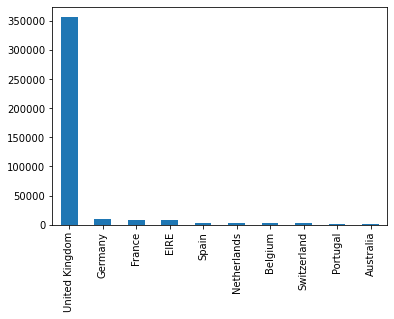

In [10]:
# Visualizando os dados dos 10 países que mais compraram

df_sem_duplicacoes.Country.value_counts()[:10].plot(kind='bar')

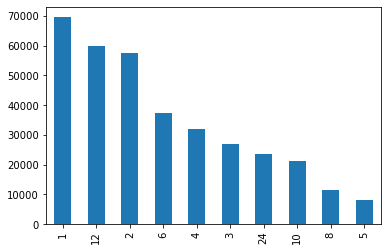

In [11]:
# Quantidade mais comprada;

df_sem_duplicacoes.Quantity.value_counts()[:10].plot(kind = 'bar')

In [12]:
# Tabela com os 15 países que mais consumiram

df_sem_duplicacoes.Country.value_counts()[:15]

United Kingdom     356728
Germany              9480
France               8475
EIRE                 7475
Spain                2528
Netherlands          2371
Belgium              2069
Switzerland          1877
Portugal             1471
Australia            1258
Norway               1086
Italy                 803
Channel Islands       757
Finland               695
Cyprus                611
Name: Country, dtype: int64

In [13]:
# Obtendo a lista dos 10 países que mais consomem (por volume total
#de vendas)

df_sem_duplicacoes['Total'] = df_sem_duplicacoes.UnitPrice * df_sem_duplicacoes.Quantity
df_sem_duplicacoes_CQT = df_sem_duplicacoes[['Country', 'Quantity' , 'Total']]
volume_de_venda = df_sem_duplicacoes_CQT.groupby('Country').sum().sort_values('Total', ascending = False).head(10)


#df_sem_duplicacoes_CQT
volume_de_venda


<ipython-input-13-3b1b6c02acf5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_duplicacoes['Total'] = df_sem_duplicacoes.UnitPrice * df_sem_duplicacoes.Quantity


,Quantity,Total
Country,,
United Kingdom,3994870,6.747156e+06
Netherlands,200128,2.846615e+05
EIRE,136187,2.500018e+05
Germany,117341,2.215095e+05
France,109806,1.966260e+05
Australia,83643,1.370098e+05
Switzerland,29778,5.573940e+04
Spain,26817,5.475603e+04
Belgium,23152,4.091096e+04


# Análise dos registros com comportamentos anômalos

Considerando os dados que possuem valores de quantidades < 0 (zero). Analisar se o comprador fez a compra e depois resolveu devolver. Ou se foi enviado por brinde;

In [ ]:
# SEleciona da tabela df_sem_duplicacoes os valores que possuem na 
#coluna Quantity < 0;

df_dados_anomalos = df_sem_duplicacoes[df_sem_duplicacoes.Quantity < 0 ]
df_dados_anomalos.head().sort_values('Total', ascending = False)

In [ ]:
# Ordenando os dados por consumidores e totais;

print('Os 10 consumidores que mais impactaram negativamente na empresa: ')
df_dados_anomalos = df_dados_anomalos[['CustomerID', 'Total']]

#Imprimindo os 10 maiores, agrupando por CustomerID e classificando por Total maior para menor;
print(df_dados_anomalos.groupby('CustomerID').sum().sort_values('Total', ascending = False).head(10))

print ('Número total de consumidores: {}'.format(df_dados_anomalos.CustomerID.count()))
       
print ('O Valor total consumido: {}'.format(df_dados_anomalos.Total.sum()))

In [ ]:
# Analisando o comportamento do consumidor de id 16446

df_CustomerID = df_sem_duplicacoes[df_sem_duplicacoes.CustomerID == 16446.0]
df_CustomerID

# Notamos que um produto foi comprado e devolvido;

In [ ]:
# Eliminando as vendas que não se concretizaram

# Filtra pelas colunas indicadas e cria a tabela no qual se os valores
#forem duplicados nas colunas indicadas retorna False;

mascara = df_sem_duplicacoes [['StockCode', 'Description', 'UnitPrice',
                               'CustomerID']].duplicated(keep=False)

# Atribuo esta tabela os valores da tabela sem_duplicacao retirando
# os valores Falsos, filtrados anteriormente;
df_sem_duplicacoes_final = df_sem_duplicacoes[~mascara]

# Retiramos os dados de compras não concretizados e exibimos
# o resultado novamente para o cliente de código 16446

df_CustomerID = df_sem_duplicacoes_final[df_sem_duplicacoes_final.CustomerID == 16446.0]
df_CustomerID



In [ ]:
# Vamos analisar o consumidor 17548.0, com base no dataset que
# contém transações com consumidores identificados;

df_identificado[df_identificado.CustomerID == 17548.0]

# RFM (Recency, Frequency, Monetary)

Recency = calcula o número de dias entre o dia base (última compra +1) e a última compra por cada consumidor;

Frequency = cálcula o número de compras realizadas por cada consumidor;

Monetary = calcula o valor total pago por cada consumidor;

In [ ]:
# Agora, utilizaremos apenas os dados de compras efetivadas e com
# compradores identificados;

df_rfm = df_sem_duplicacoes_final[df_sem_duplicacoes_final.Quantity > 0]

df_rfm.describe()

In [ ]:
# Realizando operações de conversão e obtenção dos valores
# extremos da dimensão data

# convertendo o valor da tabela para datetime
df_rfm['InvoiceDate'] = pd.to_datetime(df_rfm['InvoiceDate'])

# Atribui os valores para maior e menor data;
menor_data, maior_data = df_rfm['InvoiceDate'].min(), df_rfm['InvoiceDate'].max()


# Agora, adicionamos um dia à maior compra para iniciarmos a análise
maior_data = maior_data + pd.DateOffset(days=1)



In [ ]:
# Por curiosidade, quais os produtos foram mais comprados durante
# os primeiros dias?

((df_rfm.groupby(['InvoiceDate']).first()).
 groupby('Description').count().sort_values('Quantity', ascending = False).head(10))['Quantity']

In [ ]:
# Agora, quando tivemos as dez maiores vendas?

df_rfm.groupby('InvoiceDate')[['Total']].sum().sort_values('Total', ascending = False).head(10)

In [ ]:
# Vamos saber quais foram os produtos mais vendidos (quantidade de vezes)

print ('Produtos mais vendidos (quantidade)')
print (df_rfm.groupby('Description')[['Quantity', 'Total']].sum().sort_values('Quantity', ascending=False).head(10))
print ('#######################################\n')

print ('Produtos mais vendidos (valor)')
print (df_rfm.groupby('Description')[['Quantity', 'Total']].sum().sort_values('Total', ascending=False).head(10))

print ('#######################################\n')

print ('Produtos menos vendidos (quantidade)')
print (df_rfm.groupby('Description')[['Quantity', 'Total']].sum().sort_values('Quantity', ascending=True).head(10))

print ('#######################################\n')

print ('Produtos menos vendidos (valor)')
print (df_rfm.groupby('Description')[['Quantity', 'Total']].sum().sort_values('Total', ascending=True).head(10))



In [ ]:
# Dividindo em quatro períodos para análise

periodoA, periodoB, periodoC, periodoD = pd.date_range(menor_data, maior_data, periods=4)


In [ ]:
tabela_rfm = df_rfm.groupby('CustomerID').agg({'InvoiceDate': lambda date: (maior_data - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Total': lambda valor: valor.sum()})

tabela_rfm.head(6).sort_values('Total', ascending=False)

In [ ]:
# Renomeando as colunas de acordo com análise de RFM

tabela_rfm.columns = ['recency', 'frequency', 'monetary']

# Visualizando os consumidores que mais compraram na loja

tabela_rfm.head().sort_values('frequency', ascending=False)

In [ ]:
# classificando os dados de acordo com quartis

# mais recente, mais importante
tabela_rfm['recency_quartile'] = pd.qcut(tabela_rfm['recency'], 4, ['1', '2', '3', '4'])

tabela_rfm['frequency_quartile'] = pd.qcut(tabela_rfm['frequency'], 4, ['4', '3', '2', '1'])

tabela_rfm['monetary_quartile'] = pd.qcut(tabela_rfm['monetary'], 4, ['4', '3', '2', '1'])



In [ ]:
# Visualizando o resultado

tabela_rfm.head()

In [ ]:
tabela_rfm['Score'] = tabela_rfm.recency_quartile.astype(str) + tabela_rfm.frequency_quartile.astype(str) + tabela_rfm.monetary_quartile.astype(str)

tabela_rfm.head()